# Train

In [169]:
%matplotlib inline
import utils; reload(utils);
import vgg16; reload(vgg16);

In [198]:
path = "data/redux/"
batch_size = 64
vgg = vgg16.Vgg16()
!mkdir -p $path/train
!touch -p $path/valid
batches = vgg.get_batches(path+"train", batch_size=batch_size)
val_batches = vgg.get_batches(path+"valid", batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

touch: invalid option -- 'p'
Try 'touch --help' for more information.
Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 597s - loss: 0.1181 - acc: 0.9680 - val_loss: 0.0716 - val_acc: 0.9840


In [199]:
%mkdir $path/results
vgg.model.save_weights(path+"results/redux.h5")

mkdir: cannot create directory ‘data/redux//results’: File exists


In [ ]:
vgg.model.load_weights(path+"results/redux.h5")

# Validation

Found 2000 images belonging to 2 classes.


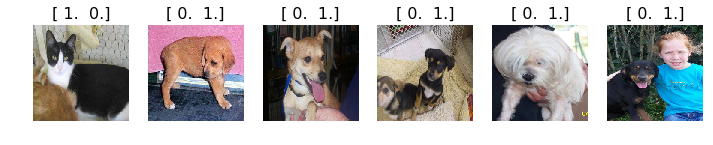

In [201]:
test_batches = vgg.get_batches(path+"valid", batch_size=6)
imgs, labels = next(test_batches)
vgg.predict(imgs)
utils.plots(imgs, titles=labels)

# Test

In [202]:
import numpy as np
batches, probs = vgg.test(path+"test", batch_size=batch_size)

Found 12500 images belonging to 1 classes.


In [218]:
probs_dog = np.asarray([i[1] for i in probs])
np.clip(probs_dog, 0.05, 0.95, out=probs_dog)
ids = [i.split('/')[1].split('.')[0] for i in batches.filenames]
total = zip(ids, probs_dog)

In [221]:
import csv

!mkdir $path/results
!touch $path/results/csv.csv
!touch $path/sample/results/csv.csv
with open(path+"results/csv.csv", 'wb') as f:
    wr = csv.writer(f)
    wr.writerow(['id','label'])
    for row in total:
        wr.writerow(row)

mkdir: cannot create directory ‘data/redux//results’: File exists


In [222]:
from IPython.lib.display import FileLink
FileLink(path+'results/csv.csv') 

/home/ubuntu/courses/deeplearning1/nbs/data/redux/results/csv.csv

# Misc File Manip

In [189]:
!touch $path/test/unknown
parent = path.rsplit('/',2)[0]
%cp `find $parent/test/unknown/ -type f | shuf -n 10` $path/test/unknown

Write to CSV

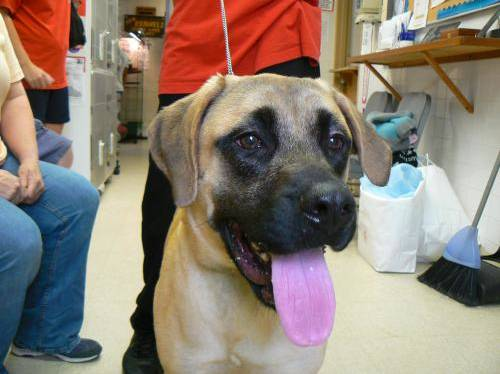

In [196]:
from IPython.display import Image
Image(filename=path+"test/unknown/9778.jpg") 